In [1]:
from src.Funciones import *

In [40]:
r1 = grafeno().mRot30
r2m = grafeno3().mRot(13.17355)
#r2 = importa(CdS.vasp)

AttributeError: 'Red' object has no attribute 'mRot30'

In [2]:
class sistem:
    def __init__(self, lol, name="", th=0.0):
        '''
        Inicializa el 'sistema' formado por la lista de Redes descrita en 'lol' dandole el nombre 'name'.
        lol  -> Lista de redes que conforman el sistema
        name -> Nombre del sistema
        '''
        self.redes = lol
        self.name = name
        self.theta = th
        self.results = []
    
    def compute(self, rangeOfSearch=15, epsilon=0.1):
        '''
        Busca las variables que desciben las transformaciones que debe tener cada Red del sistema para coincidir con una Super-Red común a todas ellas.
        rangeOfSearch -> Rango de busqueda de los posibles valores de transformaciòn de la red 1
        epsilon       -> Error máximo permitido para las transformaciones
        '''
        if len(self.redes)==2:
            lor = calculaPares(self.redes[0], self.redes[1], th=self.theta, maxIt=rangeOfSearch, eps=epsilon)
            self.results = lor
        
    def analyze(self, rangeOfAngleSearch=(0.0,180.0), rangeOfSearch=15, precision=2, maxErr=0.05):
        '''
        Analiza el sistema buscando los ángulos de rotaciòn para red2 en los que sin modificar las redes el error es mínimo.
        rangeOfAngleSearch -> Rango de búsqueda para el ángulo señalado por el par (ángulo inicial, ángulo final)
        rangeOfSearch      -> Rango de busqueda de los posibles valores de transformaciòn de la red 1
        precision          -> Precición de la busqueda dada por la cantidad de dìgitos despues del punto en que se busca (1=decimos de grado,2=centecimos de grado,...)
        maxErr             -> Error màximo tolerable para ser aceptado
        '''
        if len(self.redes)==2:
            return analiza(self.redes[0], self.redes[1], roAng=rangeOfAngleSearch, erMax=maxErr, mor=rangeOfSearch, accuracy=precision)

In [5]:
s1=sistem([r1,r2],name="sistema de prueba")

Analizando para theta en intervalo [20.0°,25.0°]
.............
**********Exploración finalizada**********


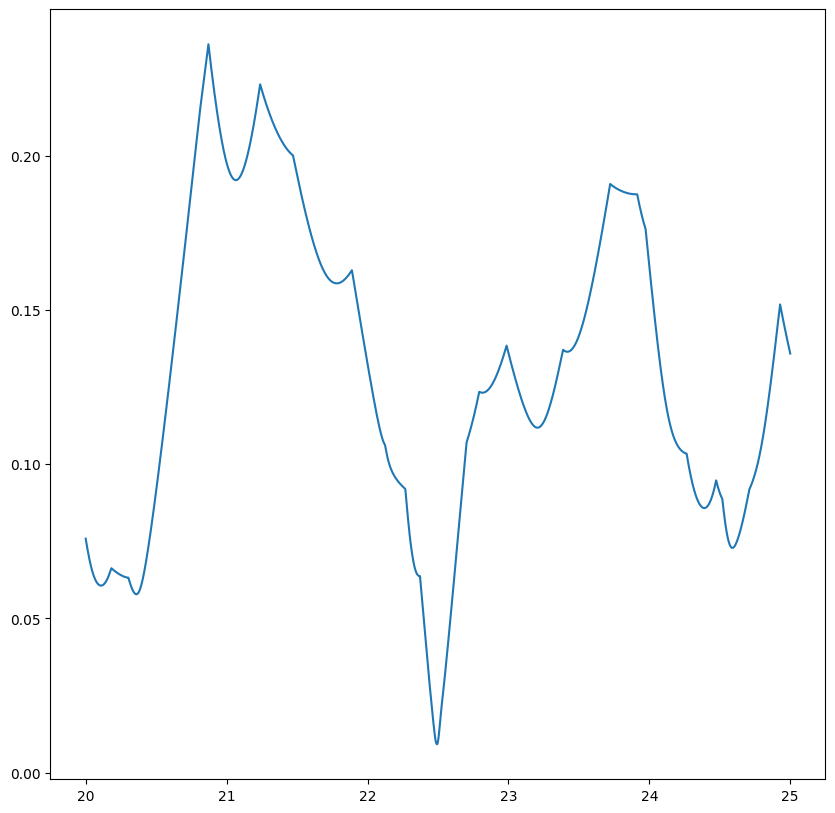

**********
Los ángulos con los errores mínimos son:
	20.109 : 0.06062
	20.360 : 0.05781
	22.370 : 0.06371
	22.493 : 0.00916
	24.390 : 0.08576
	24.590 : 0.07285


([[20.109, 0.06061916034054832],
  [20.36, 0.05781181378455491],
  [22.37, 0.0637115101902174],
  [22.493, 0.009162067909074322],
  [24.39, 0.08576164186321038],
  [24.59, 0.07284712381706904]],
 array([[20.        ,  0.07583393],
        [20.001     ,  0.07554981],
        [20.002     ,  0.07526783],
        ...,
        [24.998     ,  0.1362828 ],
        [24.999     ,  0.13607854],
        [25.        ,  0.1358748 ]]))

In [6]:
s1.analyze(rangeOfAngleSearch=(20.0,25.0), precision=3, maxErr=0.1)

In [7]:
lor=calculaPares(r1,r2,eps=0.6)

In [8]:
l=top(lor)

In [9]:
muestra(l,r1,r2)

Mejores candidatos para Super-Red:'R1=Grafeno',R2='GeSe-Alfa(rot 22.49°)'

+-----------+-----------+-----------+-----------------------+-------------------------+--------------+
| # de Atms |     T1    |     T2    | Tención/Rotación Red1 |  Tención/Rotación Red2  |     Err      |
+-----------+-----------+-----------+-----------------------+-------------------------+--------------+
|    977    | | 14   9| | |  9   6| |         -0.0%         | (-2.09881%, -35.51623%) | 0.0150643634 |
|           | | -9  23| | | -6  15| |          0.0°         |  (-21.92294°, 8.07706°) |              |
|           |           |           |                       |                         |              |
|    319    | |  0  12| | |  1   5| |         -0.0%         |  (37.44657%, -9.4692%)  | 0.0156804117 |
|           | |-12  12| | | -5   6| |          0.0°         | (-13.54172°, -1.43828°) |              |
|           |           |           |                       |                         |              

1

In [10]:
p1=m2V(r1.a,r1.b,(0,-12))
p2=m2V(r1.a,r1.b,(12,12))

In [11]:
r3=superMesh(p1,p2,[r1,r2])

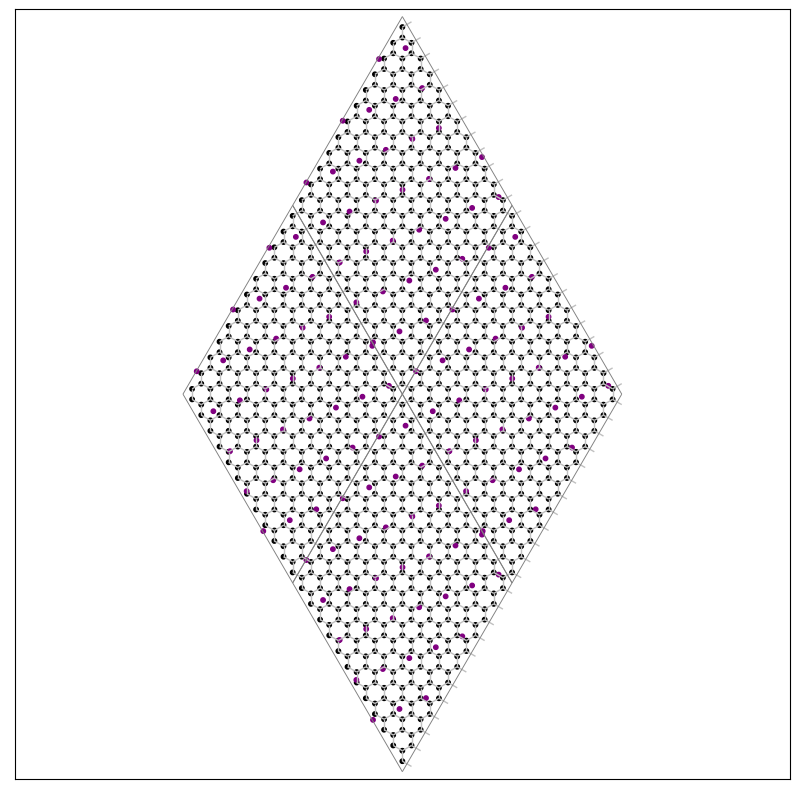

1

In [12]:
r3.showXY(2,2)

In [138]:
rx=superMesh((50,0),(0,50),[r1,r2])

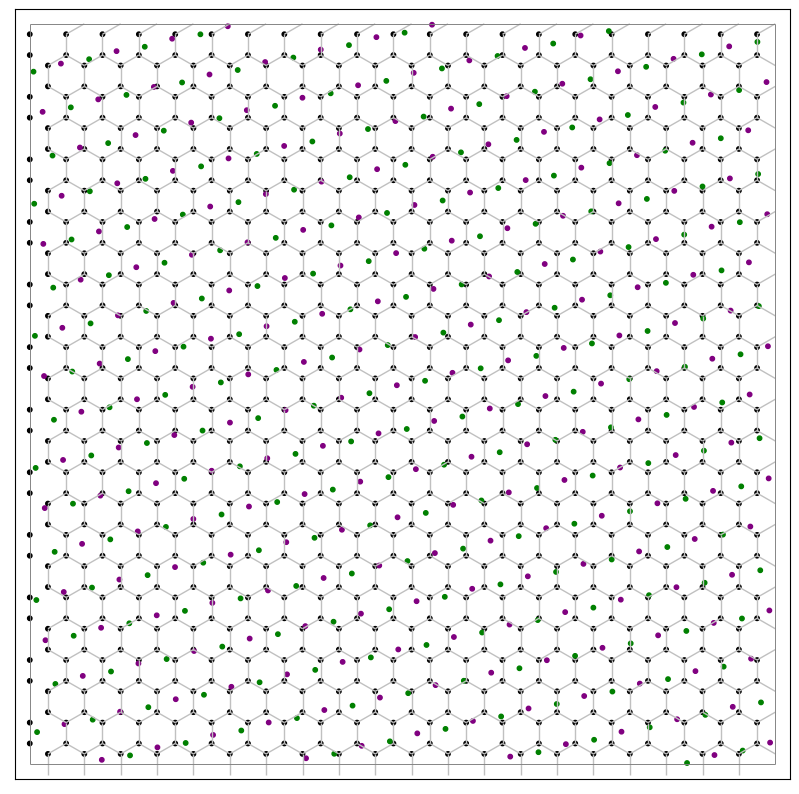

In [139]:
rx.showme()

In [60]:
analiza?

In [70]:
r1.theta

0.0

In [8]:
ejemplos()

Se cuenta con redes predefinidas, estas son:
hexa6(p,atms,name) -> Genera una Red hexagonal con constante de red 'p' y con los atomos de la lista atms.
    Si atms no se dá, entonces tendrá 2 átomos dentro de su base, generando una red hexagonal con 6 simetrias radiales.

hexa3(p,atms,name) -> Genera una Red hexagonal con constante de red 'p' y con los atomos de la lista atms.
    Si esta no se da entonces tendrá 2 átomos, uno dentro de su base y otro en un vertice, generando una red hexagonal con 3 simetrias radiales.

rectMesh(p1,p2,atms,name) -> Genera una Red rectangular con las constantes de red p1, p2 y los átomos señalados en la lista atms.
    Si esta no se dá, se generará con un solo átomo en el centro de su base.

grafeno() -> Genera una red de Grafeno, con constante de red 2.44 A y con sus átomos acomodados en el formato de hexa6

grafeno3() -> Genera una red de Grafeno, con constante de red 2.44 A y con sus átomos acomodados en el formato de hexa3

blackPhospho() -> Genera 

In [28]:
rx.atms[0][0].color
for i in range(len(rx.atms[0])):
    rx.atms[0][i].color='blue'
    

In [129]:
r3.reciprocalVectors

[(0.13553031292449497, 0.31299385060124557, -0.0),
 (-0.33882578231123744, -0.03912423132515569, 0.0),
 (-0.0, -0.0, 0.3141592653589793)]

In [13]:
def buscaEsquina(m, j, e1, e2):
    ind = -1
    val = (10.0)**300
    for i in range(len(m)):
        if not(i==e1 or i==e2):
            if (m[i][j]>0):
                c = m[i][len(m)+2]/m[i][j]
                if c < val:
                    val = c
                    ind = i
    return ind
def opera(m,e,s):
    m[s] = m[s]/(m[s][e])
    for i in range(len(m)):
        if i!=s:
            piv=m[i][e]
            m[i] = m[i]-(m[s]*piv)

def pmat(m):
    for i in range(len(m)):
        lin = ""
        for j in range(len(m[0])):
            lin = lin+"\t"+str(round(m[i][j],2))
        print(lin)
    print("")
    
def dameVecinos(red):
    b1, b2 = to2D(red.reciprocalVectors[0]), to2D(red.reciprocalVectors[1])
    d1 = long(m2V(b1,b2,(1,1)))
    d2 = long(m2V(b1,b2,(-1,1)))
    if d1<d2:
        n = round(d2/d1)
    else:
        n = round(d1/d2)
    vec = []
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            if (i,j)!=(0,0):
                v = m2V(b1,b2,(i,j))
                vec.append([v,long(v),(i,j)])
    vec=sorted(vec, key=lambda op : op[1])
    vecinos=[]
    vC=[]
    ind=0
    while len(vecinos)<8 and ind<len(vec):
        if califica(vec[ind][2],vC):
            #vecinos.append([vec[ind][0],vec[ind][1],vec[ind][2]])
            vecinos.append(vec[ind][0])
            vC.append(vec[ind][2])
        ind+=1
    return vecinos

def califica(pos, lista):
    for i in range(len(lista)):
        (px,py) = pos
        (lx,ly) = lista[i]
        if px!=0:
            k=lx/px
            if k>0:
                if ly==k*py:
                    print("({},{}) es tapado por ({},{})".format(px,py,lx,ly))
                    return False
        elif py!=0:
            k=ly/py
            if k>0:
                if lx==k*px:
                    print("({},{}) es {} veces ({},{})".format(px,py,k,lx,ly))
                    return False
    return True
    
def calcVerticesFBZ(red, show=False):
    b1, b2 = to2D(red.reciprocalVectors[0]), to2D(red.reciprocalVectors[1])
    pts = []
    vecinos = dameVecinos(red)
    '''[m2V(b1,b2,( 1, 0)),m2V(b1,b2,( 1, 1)),
             m2V(b1,b2,( 0, 1)),m2V(b1,b2,(-1, 1)),
             m2V(b1,b2,(-1, 0)),m2V(b1,b2,(-1,-1)),
             m2V(b1,b2,( 0,-1)),m2V(b1,b2,( 1,-1))]'''
    # Creamos el espacio para la matriz en que operaremos
    nVar = len(vecinos)
    v = np.array(vecinos)
    eq = np.zeros((nVar,nVar+3))
    #et = ["V1","V2","V3","V4","V5","V6","V7","V8"] 
    xy = [10,10]
    cruce = [-1,-1]
    # Damos los valores correspondientes
    for i in range(nVar):
        eq[i][i] = 1
        eq[i][nVar] = 2*v[i][0]
        eq[i][nVar+1] = 2*v[i][1]
        eq[i][nVar+2] = (v[i][0]**2) + (v[i][1]**2)
    if show:
        pmat(eq)
    # Entra valor de X
    ind = buscaEsquina(eq,nVar,xy[0],xy[1])
    xy[0]=ind
    cruce[0]=ind
    opera(eq,nVar,ind)
    # Entra valor de Y
    ind = buscaEsquina(eq,nVar+1,xy[0],xy[1])
    xy[1]=ind
    cruce[1]=ind
    opera(eq,nVar+1,ind)
    p = (round(eq[xy[0]][nVar+2],nVar+2),round(eq[xy[1]][nVar+2],nVar+2))
    pts.append(p)
    if show:
        pmat(eq)
    cont=0
    while True:
        cont+=1
        e = cruce[0]
        s = buscaEsquina(eq,e,xy[0],xy[1])
        opera(eq,e,s)
        if show:
            pmat(eq)
        cruce[0] = cruce[1]
        cruce[1] = s
        p2 = (round(eq[xy[0]][nVar+2],nVar+2),round(eq[xy[1]][nVar+2],nVar+1))
        if p2!=p:
            if p2==pts[0]:
                break
            p=p2
            pts.append(p)
        if cont>10:
            break
    
    return pts, eq


In [119]:
dameVecinos(r2)

[(-0.026136002913680012, 0.7756042667615064),
 (0.026136002913680012, -0.7756042667615064),
 (-0.7824035590129377, -0.02636512274928429),
 (0.7824035590129377, 0.02636512274928429),
 (-0.8085395619266177, 0.7492391440122221),
 (-0.7562675560992577, -0.8019693895107907),
 (0.7562675560992577, 0.8019693895107907),
 (0.8085395619266177, -0.7492391440122221)]

In [14]:

from matplotlib.patches import Polygon

In [15]:
a, eq=calcVerticesFBZ(r3,show=False)

In [16]:
a2,eq=calcVerticesFBZ(r1)
a3,eq=calcVerticesFBZ(r2)

In [17]:
t=10
xs=[]
ys=[]
enls=[]
sra,srb=to2D(r3.reciprocalVectors[0]),to2D(r3.reciprocalVectors[1])
print(sra,srb)
for i in range(-10,11):
    for j in range(-10,11):
        (px,py) = m2V(sra,srb,(i,j))
        xs.append(px)
        ys.append(py)
        o=sumaV((px,py),a[len(a)-1])
        for p in a:
            f=sumaV((px,py),p)
            enls.append([o,f])
            o=f
xs=np.array(xs)
ys=np.array(ys)
le = mc.LineCollection(np.array(enls), colors='silver', linewidths=(t/10))

(0.10729483106522518, -0.06194669959816318) (-0.10729483106522518, -0.06194669959816318)


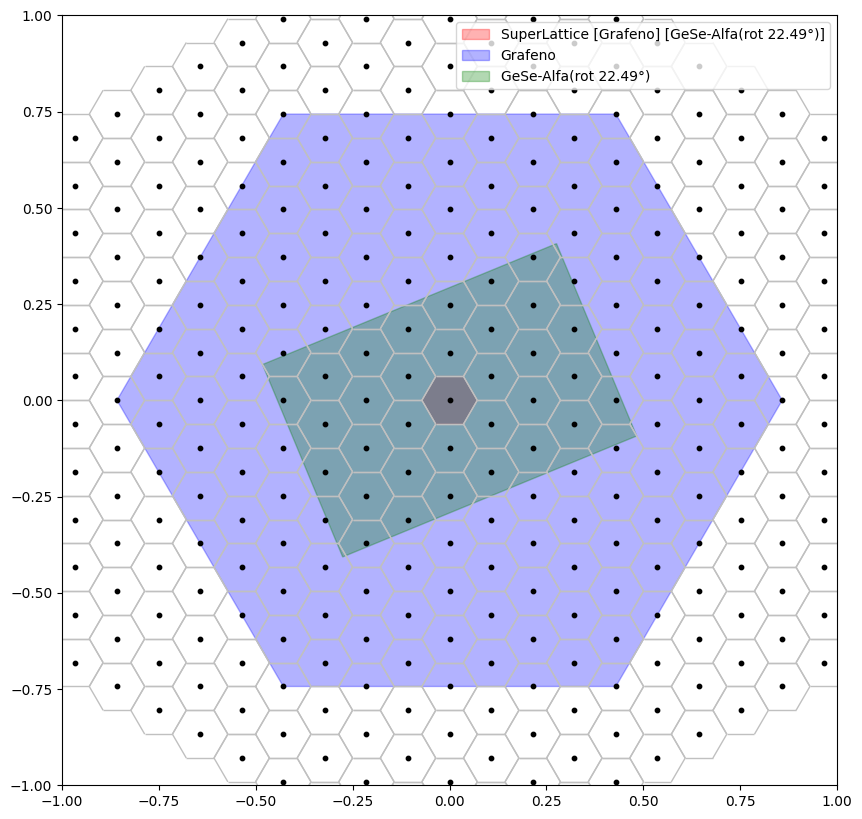

In [18]:
ax = plt.subplot()
hexa1=Polygon(a,alpha=0.3, color = 'red', label = r3.name)
ax.add_patch(hexa1)
hexa2=Polygon(a2,alpha=0.3, color = 'blue', label = r1.name)
ax.add_patch(hexa2)
hexa3=Polygon(a3,alpha=0.3, color = 'green', label = r2.name)
ax.add_patch(hexa3)
ax.add_collection(le)
ax.scatter(xs,ys, color='black',s=t)
ax.set(xlim=(-1.0,1.0), ylim=(-1.0,1.0))
ax.legend(loc = 'upper right')
plt.show()

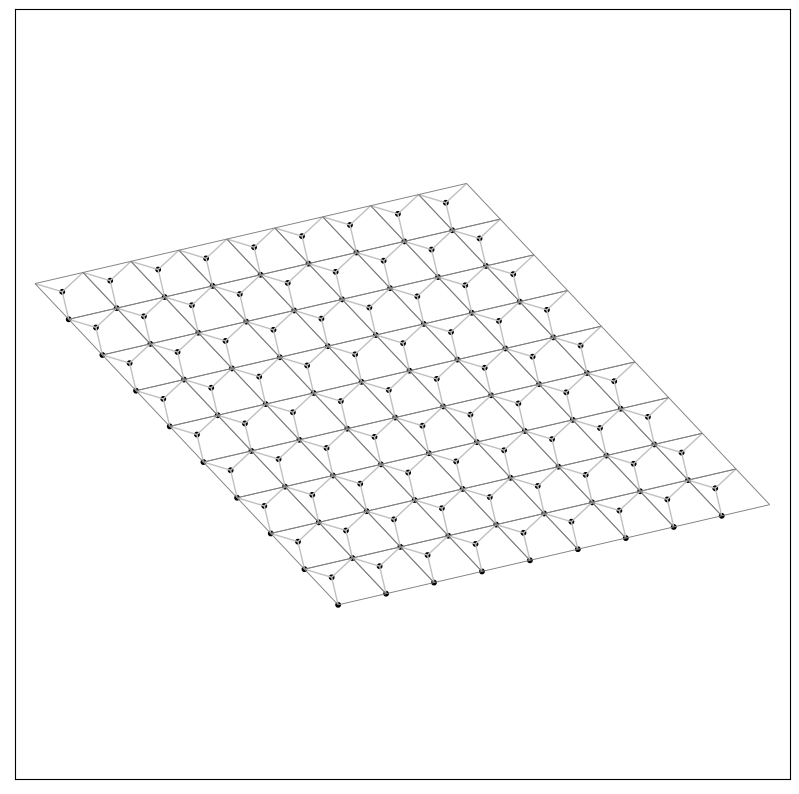

1

In [141]:
r2.showXY(9,9)

In [32]:
importa?

In [62]:
atomos=[Atomo((0.333333343,0.666666687),posZ=0.500000000,color='Red',sig='Cd'),
        Atomo((0.666666627,0.333333313),posZ=0.250000000,color='Red',sig='Cd'),
        Atomo((0.333333343,0.666666687),posZ=0.1899999975,color='gold',sig='S'),
        Atomo((0.666666627,0.333333313),posZ=0.4399999975,color='gold',sig='S')]
r1=Red((4.2100000381,0.0000000000),(-2.1050000191,3.6459669830),atms=atomos, detachment=13.6800003052 ,name='CdS')
atmsG=[Atomo((0.000000000,0.000000000)),Atomo((0.333333343,0.666666687))]
r2=Red((2.4410462379,0.0000000000),(-1.2205231190,2.1140080539),atms=atmsG,name='Grafeno').mRot(30)

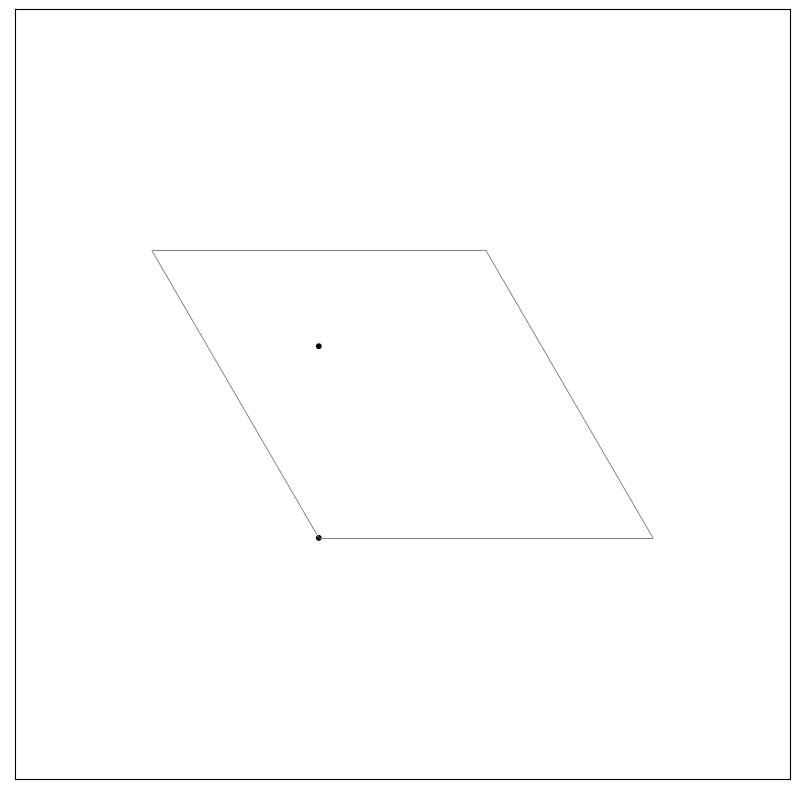

In [54]:
r2.showme()

In [3]:
def GeSeA():
    ats=[Atomo((0.75,0.577516675),posZ=0.189562783,color='blue',sig='Ge'),
         Atomo((0.25,0.077767663),posZ=0.073721662,color='blue',sig='Ge'),
         Atomo((0.25,0.050640754),posZ=0.195155814,color='green',sig='Se'),
         Atomo((0.75,0.550593972),posZ=0.068081208,color='green',sig='Se')]
    a = (4.0130319595,0.0000000000)
    b = (0.0000000000,4.0482119840)
    gese = Red(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 21.1464214325
    return gese

def GeSeB():
    ats=[Atomo((0.75,0.367782116),posZ=0.160547823,color='purple',sig='Ge')]
    '''ats=[Atomo((0.75,0.367782116),posZ=0.160547823,color='purple',sig='Ge'),
         Atomo((0.25,0.868400931),posZ=0.063394181,color='purple',sig='Ge'),
         Atomo((0.75,0.846623361),posZ=0.160837263,color='green',sig='Se'),
         Atomo((0.25,0.346943438),posZ=0.063084550,color='green',sig='Se')]'''
    a = (3.8261001110,0.0000000000)
    b = (0.0000000000,5.8088998795)
    gese = Red(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 18.0892009735
    return gese


In [6]:
r1=grafeno()
r2=GeSeB().mRot(22.49)

In [177]:
dameVecinos(r2)

[(0.0, 0.5408240318750691),
 (0.0, -0.5408240318750691),
 (-0.8210952569060451, -0.0),
 (0.8210952569060451, 0.0),
 (-0.8210952569060451, 0.5408240318750691),
 (-0.8210952569060451, -0.5408240318750691),
 (0.8210952569060451, 0.5408240318750691),
 (0.8210952569060451, -0.5408240318750691)]

In [115]:
(r2.reciprocalVectors)

[(0.7824035590129377, 0.02636512274928429, -0.0),
 (0.026136002913680012, -0.7756042667615064, 0.0),
 (0.0, -0.0, 0.3141592653589793)]

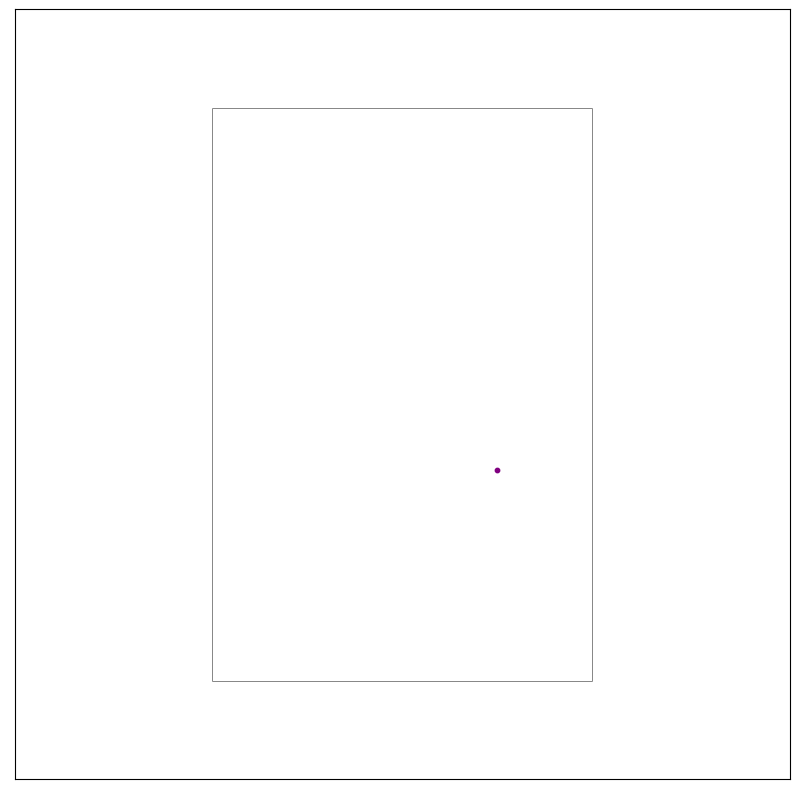

In [183]:
r2.showme()